In [1]:
print('hello world!')

[1] "hello world!"


In [2]:
adult<-read.csv("Clem3Training")
head(adult,n=10L)
#连续变量求相关系数
corrdata<-
  cbind(adult$age,adult$demogweight,adult$education.num,
        adult$capital.gain,adult$capital.loss,adult$hours.per.week)#导入想求相关系数矩阵的列名
corrpvalues<-matrix(rep(0,36),ncol = 6)
for (i in 1 : 5 ) {
  for (j in (i+1):6) {
    corrpvalues[i,j] <-
    corrpvalues[j,i] <-
      round(cor.test(corrdata[,i],
                     corrdata[,j])$p.value,
            4)#求两列向量的相关系数并保存再矩阵。4表示四舍五入在小数点后四位
  }
}
corrpvalues


,age,workclass,demogweight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K.
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K.
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K.
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K.


0,0.0000,0,0.00,0.0000,0.0000
0,0.0000,0,0.49,0.0547,0.0164
0,0.0000,0,0.00,0.0000,0.0000
0,0.4900,0,0.00,0.0000,0.0000
0,0.0547,0,0.00,0.0000,0.0000
0,0.0164,0,0.00,0.0000,0.0000


In [4]:
#输出均值等统计信息
for (i in 1 : 6 ) {
  print(summary(corrdata[,i]))
}


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.61   48.00   90.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12285  117963  178353  189742  236861 1484705 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.08   12.00   16.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1089       0   99999 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0    86.5     0.0  4356.0 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.41   45.00   99.00 


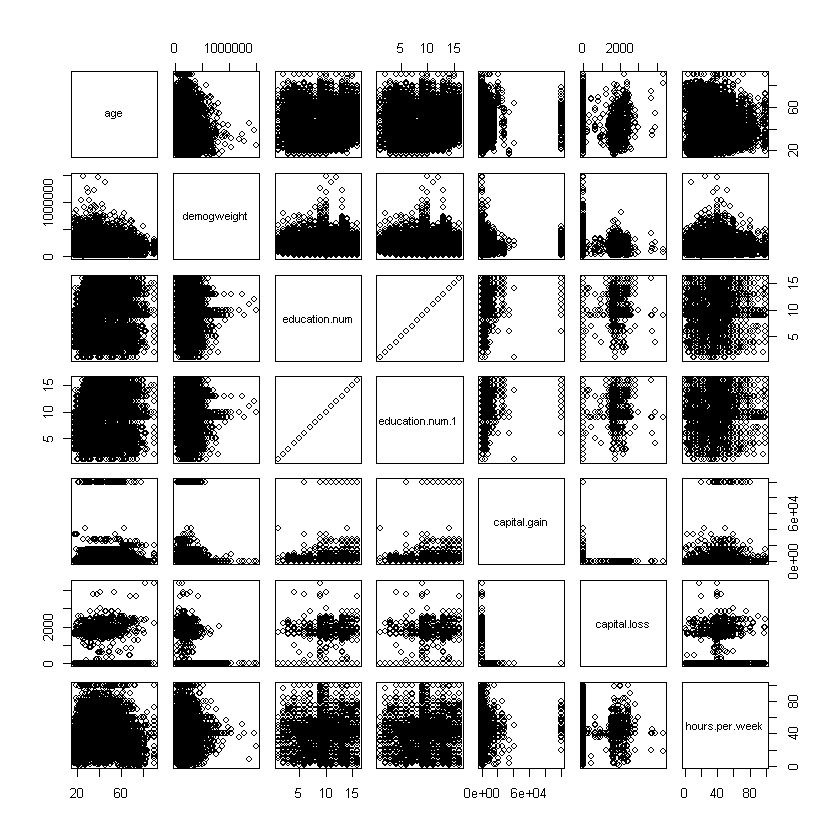

In [5]:
#绘制每对连续变量的散点图
tt=adult[,c('age','demogweight','education.num','education.num',
            'capital.gain','capital.loss','hours.per.week')]
pairs(tt)


ERROR: Error in corrdata[, i]: 下标出界


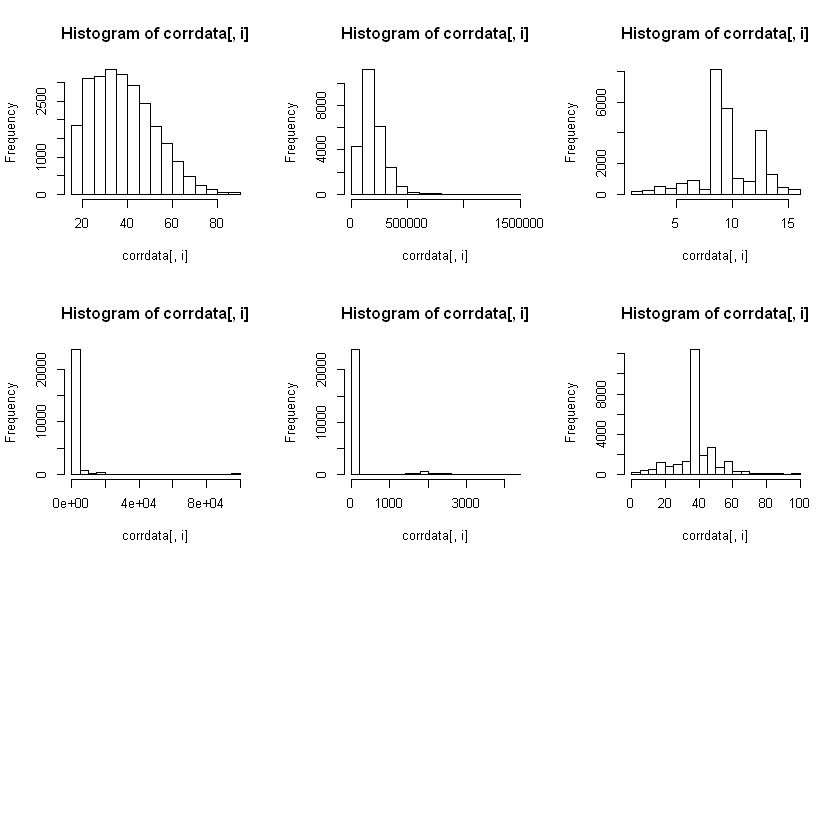

In [6]:
#连续变量直方图
par(mfrow = c(3, 3))
for (i in 1 : 7 ) {
  hist(corrdata[,i])
}


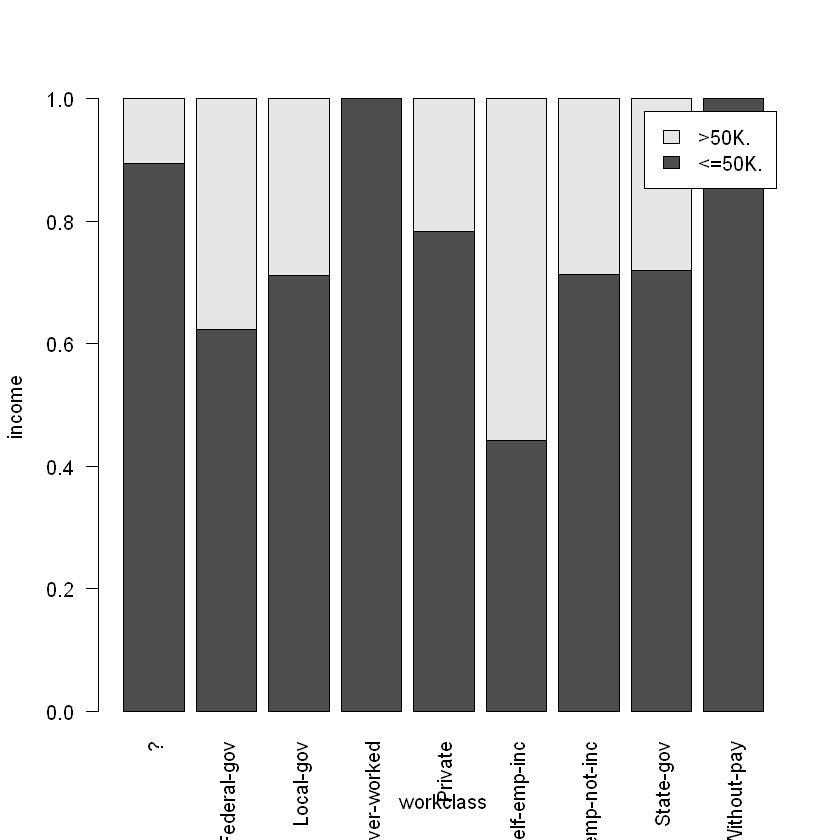

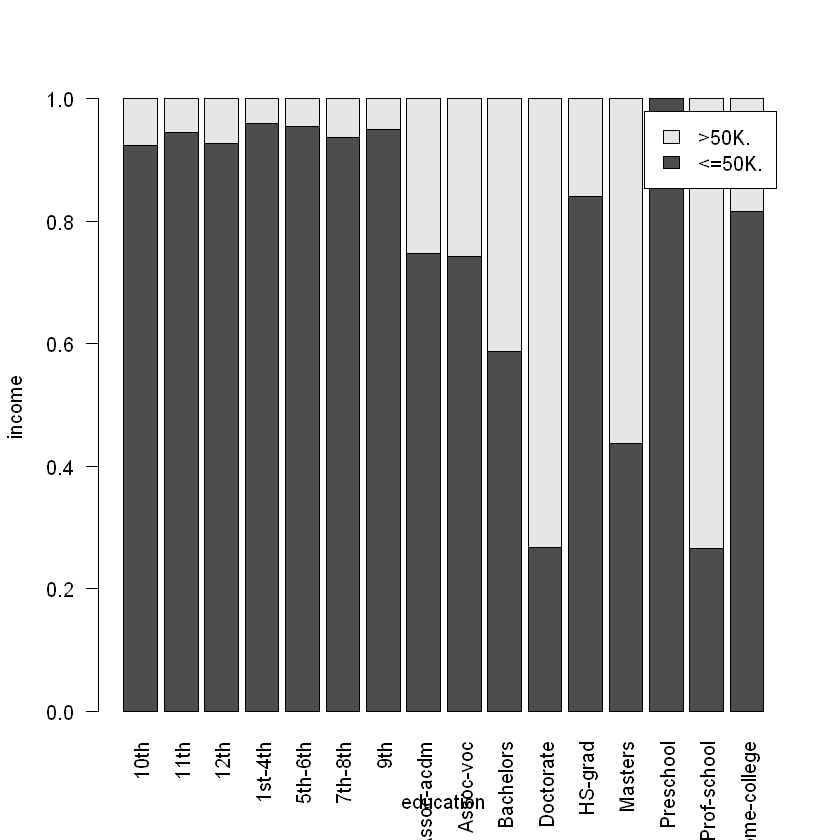

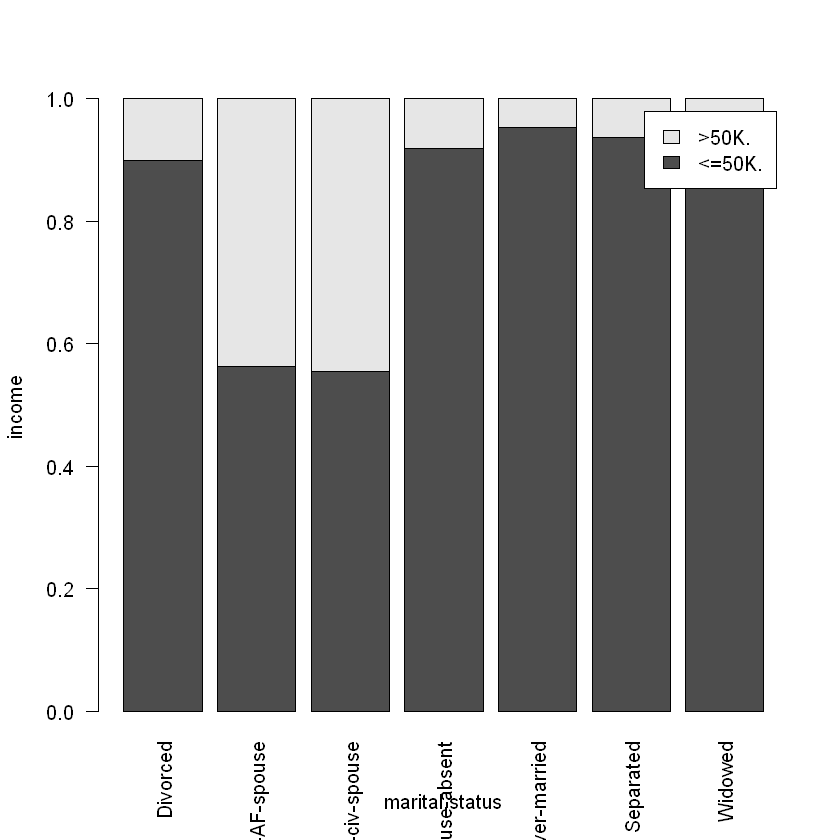

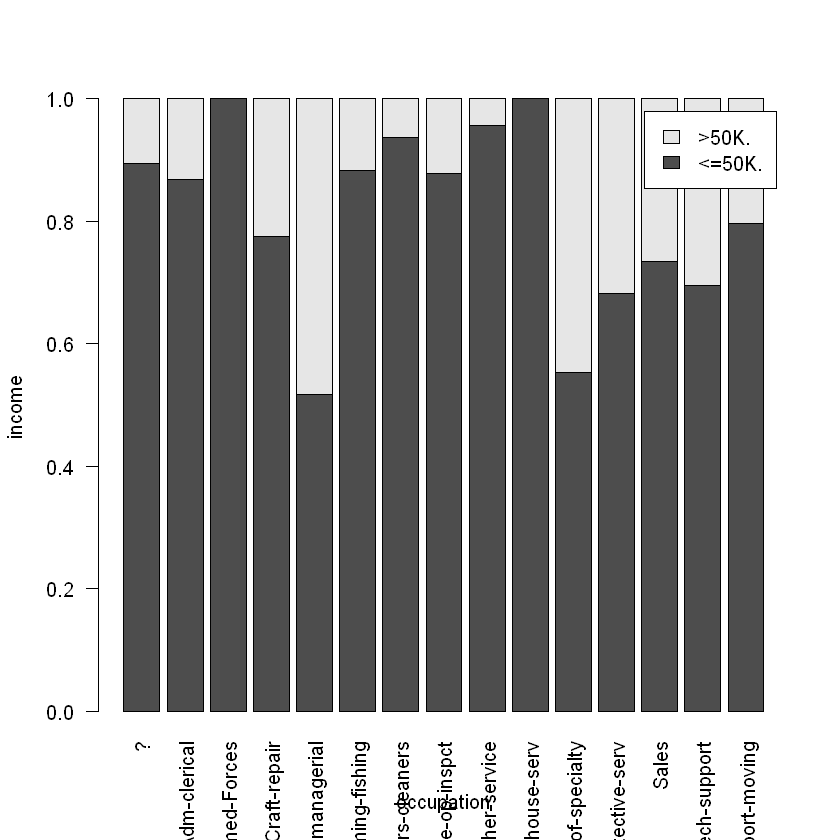

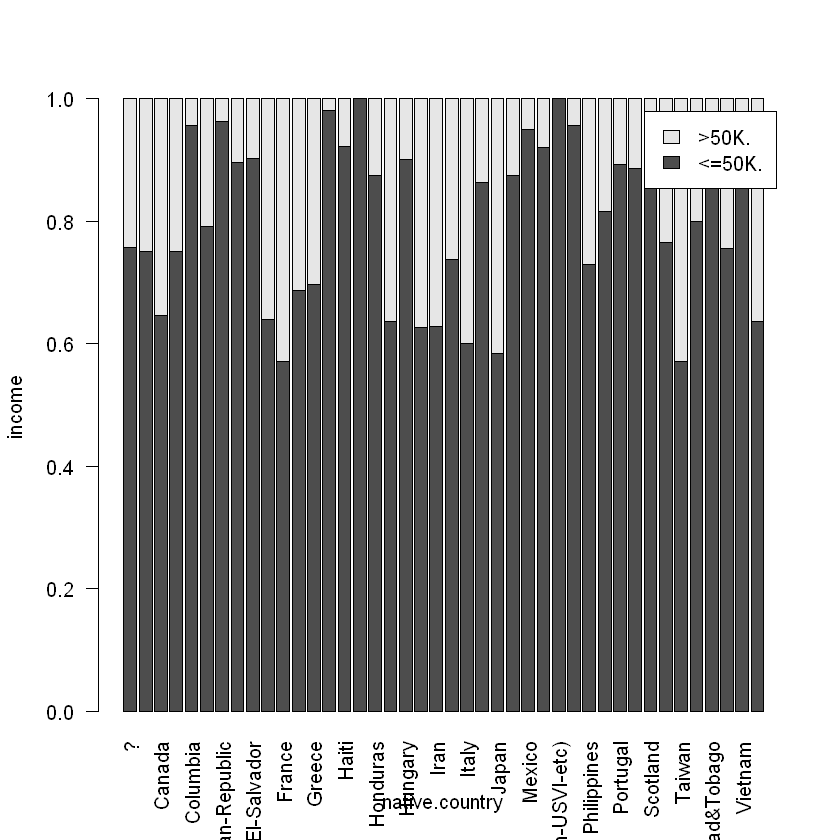

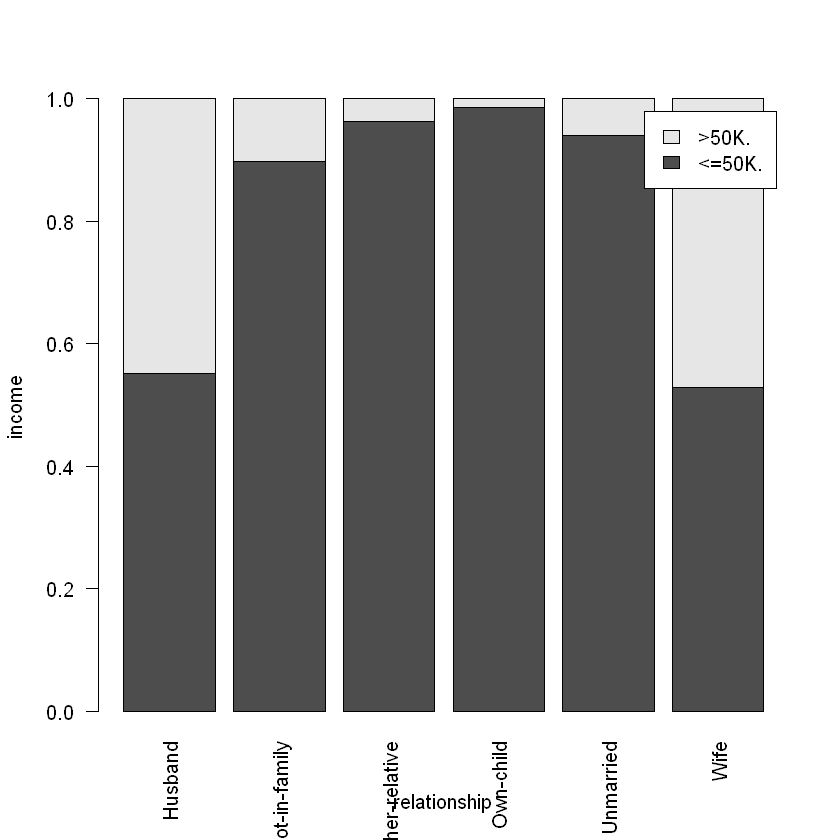

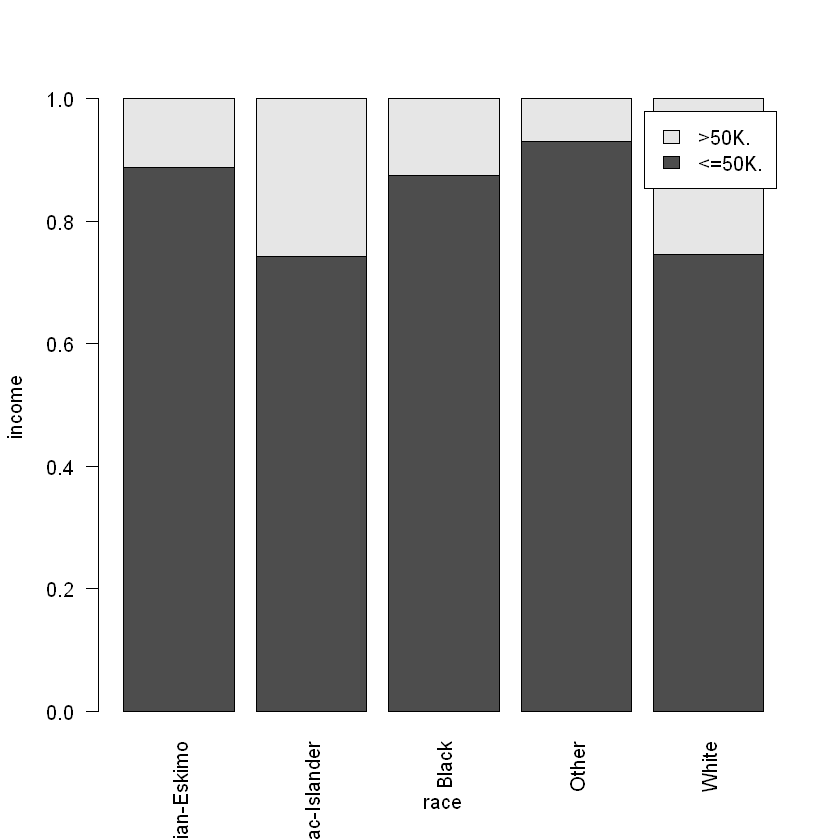

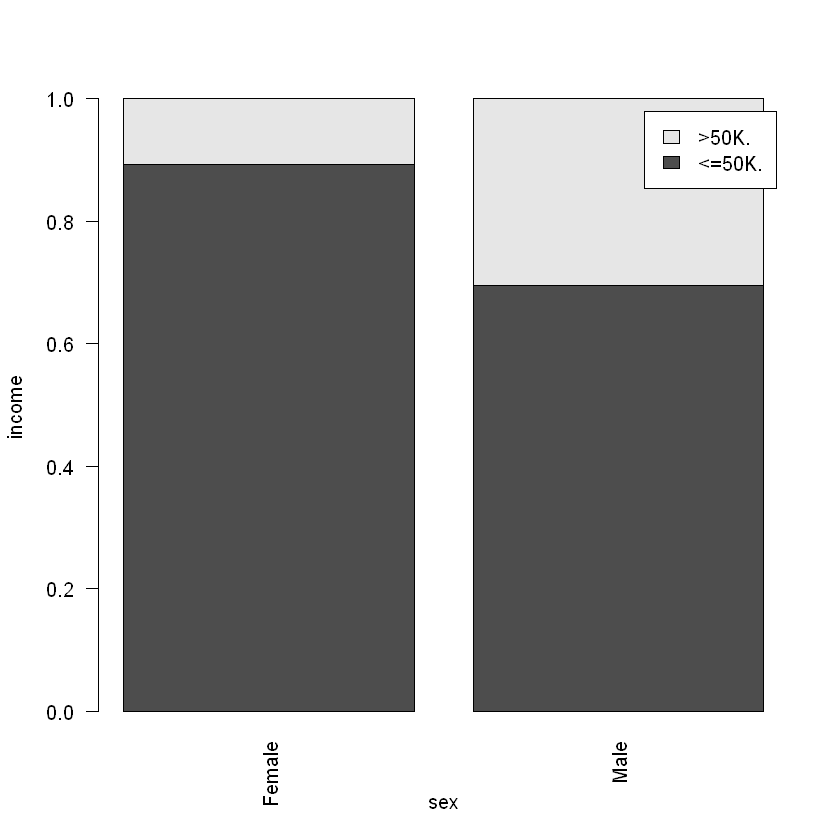

In [7]:

#分类变量画条形图
income_workclass = table(adult$income,adult$workclass)
income_education = table(adult$income,adult$education)
income_marital.status = table(adult$income,adult$marital.status)
a=prop.table(income_workclass,margin=2)
barplot(a,las=2,legend=rownames(income_workclass),ylab="income",xlab="workclass")
b=prop.table(income_education,margin=2)
barplot(b,las=2,legend=rownames(income_education),ylab="income",xlab="education")
c=prop.table(income_marital.status,margin=2)
barplot(c,las=2,legend=rownames(income_marital.status),ylab="income",xlab="marital.status")

income_occupation = table(adult$income,adult$occupation)
d = prop.table(income_occupation,margin=2)
barplot(d,las=2,legend=rownames(income_occupation),ylab="income",xlab="occupation")

income_native.country = table(adult$income,adult$native.country)
e = prop.table(income_native.country,margin=2)
barplot(e,las=2,legend=rownames(income_native.country),ylab="income",xlab="native.country")

income_relationship = table(adult$income,adult$relationship)
f = prop.table(income_relationship,margin=2)
barplot(f,las=2,legend=rownames(income_relationship),ylab="income",xlab="relationship")

income_race = table(adult$income,adult$race)
g = prop.table(income_race,margin=2)
barplot(g,las=2,legend=rownames(income_race),ylab="income",xlab="race")

income_sex = table(adult$income,adult$sex)
h = prop.table(income_sex,margin=2)
barplot(h,las=2,legend=rownames(income_sex),ylab="income",xlab="sex")


In [8]:
#离散变量画表
dispersedata = cbind(adult$workclass,adult$education,adult$marital.status,adult$occupation,
                     adult$relationship,adult$race,adult$sex,adult$income)
for (i in 1 : 7 ) {
  for (j in (i+1):8) {
    counts<-table(dispersedata[,i],dispersedata[,j])
    print(counts)
    
  }
}
write.csv(counts,'TableChapter2')

   
       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
  1   74   93   27   10   25   55   34   33   50  141    8  395   40    5   13
  2    4    4    5    0    1    2    2   47   29  165   13  211   53    0   21
  3   25   27   15    2    7   21   20   62   62  375   17  399  254    3   21
  4    2    1    0    0    0    1    0    0    0    0    0    0    0    0    0
  5  535  714  249   94  193  322  299  541  773 2753  136 5999  659   28  192
  6   16   10    4    2    3   11    9   26   31  203   30  221   64    0   56
  7   54   48   16   11   13   72   25   56   80  307   37  678  100    0  103
  8   11   12    7    1    2    6    5   35   34  196   74  210  130    0   24
  9    0    0    0    0    0    1    0    1    0    0    0    7    0    0    0
   
      16
  1  396
  2  193
  3  314
  4    1
  5 3898
  6  171
  7  378
  8  246
  9    0
   
       1    2    3    4    5    6    7
  1  141    2  483   24  583   49  117
  2  130    2  365    9  195  